In [116]:
import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import EngFormatter, StrMethodFormatter
import matplotlib.ticker as ticker
from fredapi import Fred
fred = Fred(api_key='2ed451d97ec839270c0c1ae9d68367e4')
import seaborn as sns

Part 1: Extracting series into a table and exporting to PDF
Real Gross Domestic Product

Personal Income

US Unemployment

Labor Force Participation Rate

In [93]:
fp.api_key = '2ed451d97ec839270c0c1ae9d68367e4'

In [94]:
GDP= fp.series('GDPC1')

In [95]:
PI = fp.series('PI')

In [96]:
UE = fp.series('UNRATE')

In [97]:
LPR = fp.series('CIVPART')

In [98]:
print(GDP.date_range)
print(PI.date_range)
print(UE.date_range)
print(LPR.date_range)

Range: 1947-01-01 to 2021-01-01
Range: 1946-01-01 to 2021-04-01
Range: 1948-01-01 to 2021-05-01
Range: 1948-01-01 to 2021-05-01


In [99]:
GDP.data

date
1947-01-01     2033.061
1947-04-01     2027.639
1947-07-01     2023.452
1947-10-01     2055.103
1948-01-01     2086.017
                ...    
2020-01-01    19010.848
2020-04-01    17302.511
2020-07-01    18596.521
2020-10-01    18794.426
2021-01-01    19086.375
Name: value, Length: 297, dtype: float64

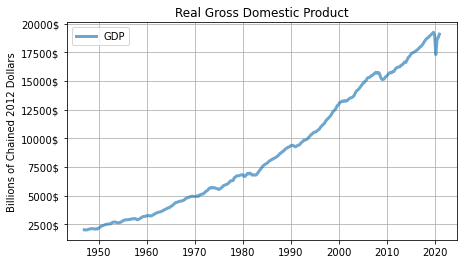

In [100]:
figGDP = plt.figure(figsize=(7,4))
val= GDP.data[1]
ax = figGDP.add_subplot(1,1,1)
ax.plot(GDP.data,'-',lw=3,alpha = 0.65,label='GDP')
ax.legend(loc='upper left')
ax.set_title(GDP.title)
ax.set_ylabel(GDP.units)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d$"))
ax.grid()

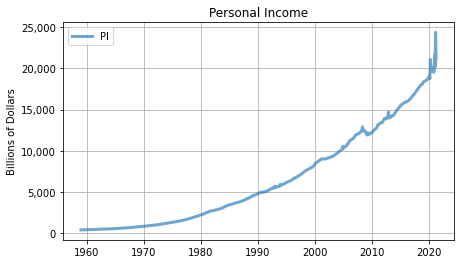

In [101]:
figPI = plt.figure(figsize=(7,4))
ax = figPI.add_subplot(1,1,1)
ax.plot(PI.data,'-',lw=3,alpha = 0.65,label='PI')
ax.legend(loc='upper left')
ax.set_title(PI.title)
ax.set_ylabel(PI.units)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.grid()

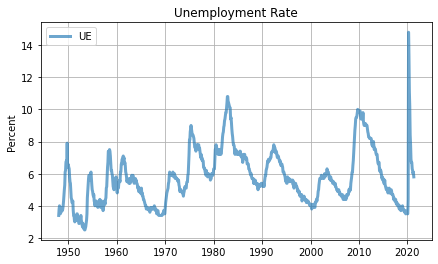

In [102]:
figUE = plt.figure(figsize=(7,4))
ax = figUE.add_subplot(1,1,1)
ax.plot(UE.data,'-',lw=3,alpha = 0.65,label='UE')
ax.legend(loc='upper left')
ax.set_title(UE.title)
ax.set_ylabel(UE.units)
ax.grid()

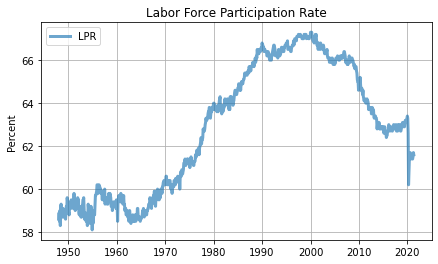

In [103]:
figLPR = plt.figure(figsize=(7,4))
ax = figLPR.add_subplot(1,1,1)
ax.plot(LPR.data,'-',lw=3,alpha = 0.65,label='LPR')
ax.legend(loc='upper left')
ax.set_title(LPR.title)
ax.set_ylabel(LPR.units)
ax.grid()

In [104]:
pp = PdfPages('Plots.pdf')
pp.savefig(figGDP)
pp.savefig(figPI)
pp.savefig(figUE)
pp.savefig(figLPR)
pp.close()

Part 2:  Extacting data series on a state level basis (will use real GDP)

In [122]:
GDP= fp.series('GDPCA')

Extracted state level GDP data using R (file: extracting_state_data.R)

In [107]:
state_df= pd.read_csv('state_level_Real_GDP.csv')

In [108]:
state_df.head()

,Unnamed: 0,symbol,date,price,state
0,1,ALRGSP,1997-01-01,144457.3,AL
1,2,ALRGSP,1998-01-01,149613.2,AL
2,3,ALRGSP,1999-01-01,155171.9,AL
3,4,ALRGSP,2000-01-01,157697.7,AL
4,5,ALRGSP,2001-01-01,157137.9,AL


In [123]:
GDP_df = pd.DataFrame(GDP.data)

In [131]:
GDP_df.reset_index(inplace=True)

In [136]:
GDP_filter = GDP_df[GDP_df['date'] > '1996-01-01T00:00:00.000000000']

In [137]:
GDP_filter.head()

,date,value
68,1997-01-01,11521.938
69,1998-01-01,12038.283
70,1999-01-01,12610.491
71,2000-01-01,13130.987
72,2001-01-01,13262.079
